# Preamble

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
import corner

seed = 102312328

# Plot

### Fiducial

In [8]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [9]:
with h5py.File('gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

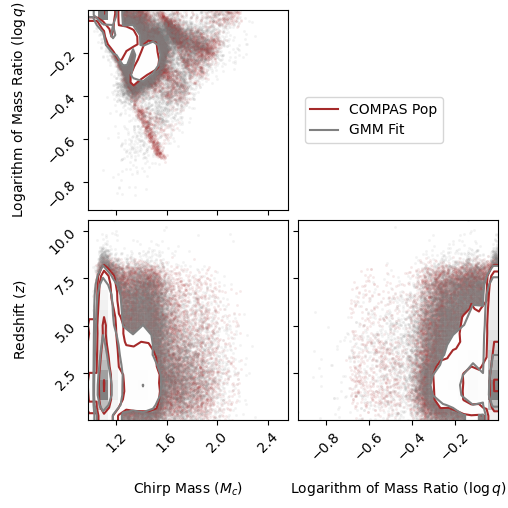

In [10]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig(var+'_gmm_all.pdf');

### Mandel-Muller

In [13]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [14]:
with h5py.File('gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

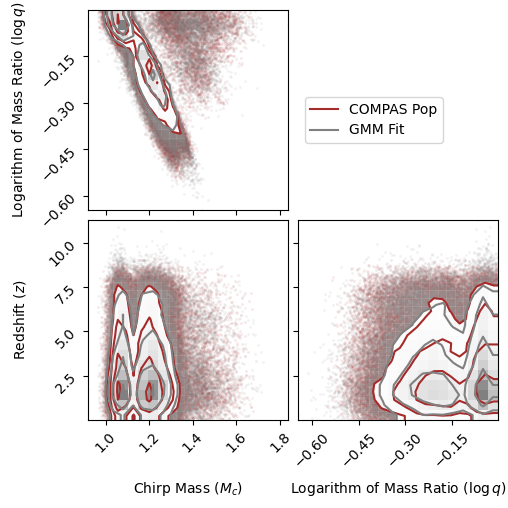

In [15]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig(var+'_gmm_all.pdf');